# **`Feature Binning`** (or Binding)?
Grouping numeric values into categories (bins).

###  Why use feature binning?

* Makes data **easier to understand**
* Useful for **visualization**
* Helps models handle **non-linear patterns**
* Reduces the effect of **outliers**



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df = pd.read_csv('cleaned_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       275 non-null    object 
 1   Name             275 non-null    object 
 2   Email            275 non-null    object 
 3   Age              275 non-null    float64
 4   Country          275 non-null    object 
 5   SignupDate       275 non-null    object 
 6   LastLogin        275 non-null    object 
 7   TotalPurchase    275 non-null    float64
 8   Feedback         185 non-null    object 
 9   CartValue        275 non-null    float64
 10  DiscountApplied  275 non-null    float64
dtypes: float64(4), object(7)
memory usage: 23.8+ KB


In [5]:
df.drop(columns=['CustomerID', 'Name', 'Email'])

,Age,Country,SignupDate,LastLogin,TotalPurchase,Feedback,CartValue,DiscountApplied
0,52.0,India,2023-10-18,2025-02-14 03:26:26,80.63,Excellent,196.06000,50.0
1,75.0,United States,2025-02-28,2025-02-17 15:38:32,27.38,NaN,136.79000,0.0
2,30.0,Germany,2023-09-10,2025-02-01 15:53:26,817.67,Bad,239.65000,20.0
3,40.0,United States,2022-05-23,2025-05-07 21:17:28,29.28,NaN,291.47000,10.0
4,54.0,United States,2024-09-12,2025-05-07 13:32:36,829.67,Average,265.40743,15.0
...,...,...,...,...,...,...,...,...
270,77.0,India,2023-12-01,2025-03-08 00:47:59,699.01,Bad,331.02000,10.0
271,45.0,United States,2022-08-18,2025-03-08 00:47:59,435.15,NaN,243.47000,20.0
272,62.0,United States,2024-07-30,2025-01-19 19:21:50,814.79,Good,257.75000,5.0
273,19.0,India,2025-04-22,2025-02-15 22:15:24,512.18,NaN,59.99000,5.0


In [6]:
print(df.Age.min())

19.0


In [7]:
print(df.Age.max())

80.0


In [8]:
labels = ['0-20','21-30','31-40','41-50','Above 50']
bins = [0,21,31,41,51,100]

In [9]:
df['Age_Bins'] = pd.cut(df.Age, bins, labels= labels, include_lowest=True)

In [10]:
print(df[["Age", "Age_Bins"]])

      Age  Age_Bins
0    52.0  Above 50
1    75.0  Above 50
2    30.0     21-30
3    40.0     31-40
4    54.0  Above 50
..    ...       ...
270  77.0  Above 50
271  45.0     41-50
272  62.0  Above 50
273  19.0      0-20
274  30.0     21-30

[275 rows x 2 columns]


<BarContainer object of 5 artists>

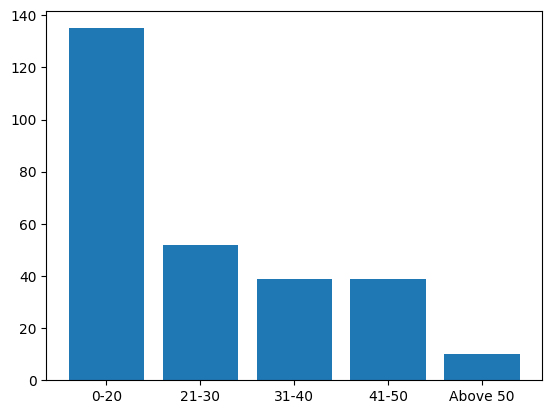

In [11]:
plt.bar(labels,df.Age_Bins.value_counts())


# **`Feature Encoding`**?
**Feature encoding** means converting **text or categories into numbers** so that machines can understand them.
- Most machine learning models can't understand words like `"India"` or `"Excellent"` — they need **numbers**!

####  Label Encoding:

| Country (Label) | Feedback (Label) |
| --------------- | ---------------- |
| 0               | 2                |
| 1               | 1                |
| 2               | 0                |

####  One-Hot Encoding:

| India | Germany | USA | Excellent | Average | Bad |
| ----- | ------- | --- | --------- | ------- | --- |
| 1     | 0       | 0   | 1         | 0       | 0   |
| 0     | 1       | 0   | 0         | 1       | 0   |
| 0     | 0       | 1   | 0         | 0       | 1   |



###  Types of Encoding:

| Encoding Type    | Description                                                              |
| ---------------- | ------------------------------------------------------------------------ |
| Label Encoding   | Convert categories to numbers (e.g., A=0, B=1, C=2)                      |
| One-Hot Encoding | Make new columns for each category (1 if it exists, else 0)              |
| Ordinal Encoding | Like label encoding but follows order (e.g., Bad=0 < Average=1 < Good=2) |




### `Lable Encoding`

In [25]:
Lable_encoder = preprocessing.LabelEncoder()
df['Feedback_lable'] = Lable_encoder.fit_transform(df.Feedback.values)

In [19]:
df[['Feedback','Feedback_lable']]

,Feedback,Feedback_lable
0,Excellent,2
1,NaN,4
2,Bad,1
3,NaN,4
4,Average,0
...,...,...
270,Bad,1
271,NaN,4
272,Good,3
273,NaN,4


### `One Hot Encoding`

In [29]:
# Dummy encoding
one_hot = pd.get_dummies(df.Country)

In [27]:
one_hot

,Germany,India,United States
0,False,True,False
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
...,...,...,...
270,False,True,False
271,False,False,True
272,False,False,True
273,False,True,False


In [32]:
# Target Engoding
from category_encoders import TargetEncoder

In [34]:
encoder = TargetEncoder()

In [37]:
df['Country_encoded'] = encoder.fit_transform(df['Country'], df['TotalPurchase'])

In [38]:
print(df[['Country', 'Country_encoded']].head())

         Country  Country_encoded
0          India       458.388620
1  United States       544.784730
2        Germany       521.478897
3  United States       544.784730
4  United States       544.784730
